<a href="https://www.kaggle.com/code/josuadaniel/house-price-ensemble-model?scriptVersionId=122857903" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## data inputter  , memasukkan data

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# chalange at this practice was to 
- Create feature engineering 
- Advanced regression techniques like random forest and gradient boosting

In [2]:
import pandas as pd 
import numpy as np 

In [3]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
sample_submission = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")

In [4]:
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.shape

(1460, 81)

In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test.shape

(1459, 80)

In [8]:
sample_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [9]:
sample_submission.shape

(1459, 2)

## preview data  , check isi data 

In [10]:
import missingno as msno

<AxesSubplot:>

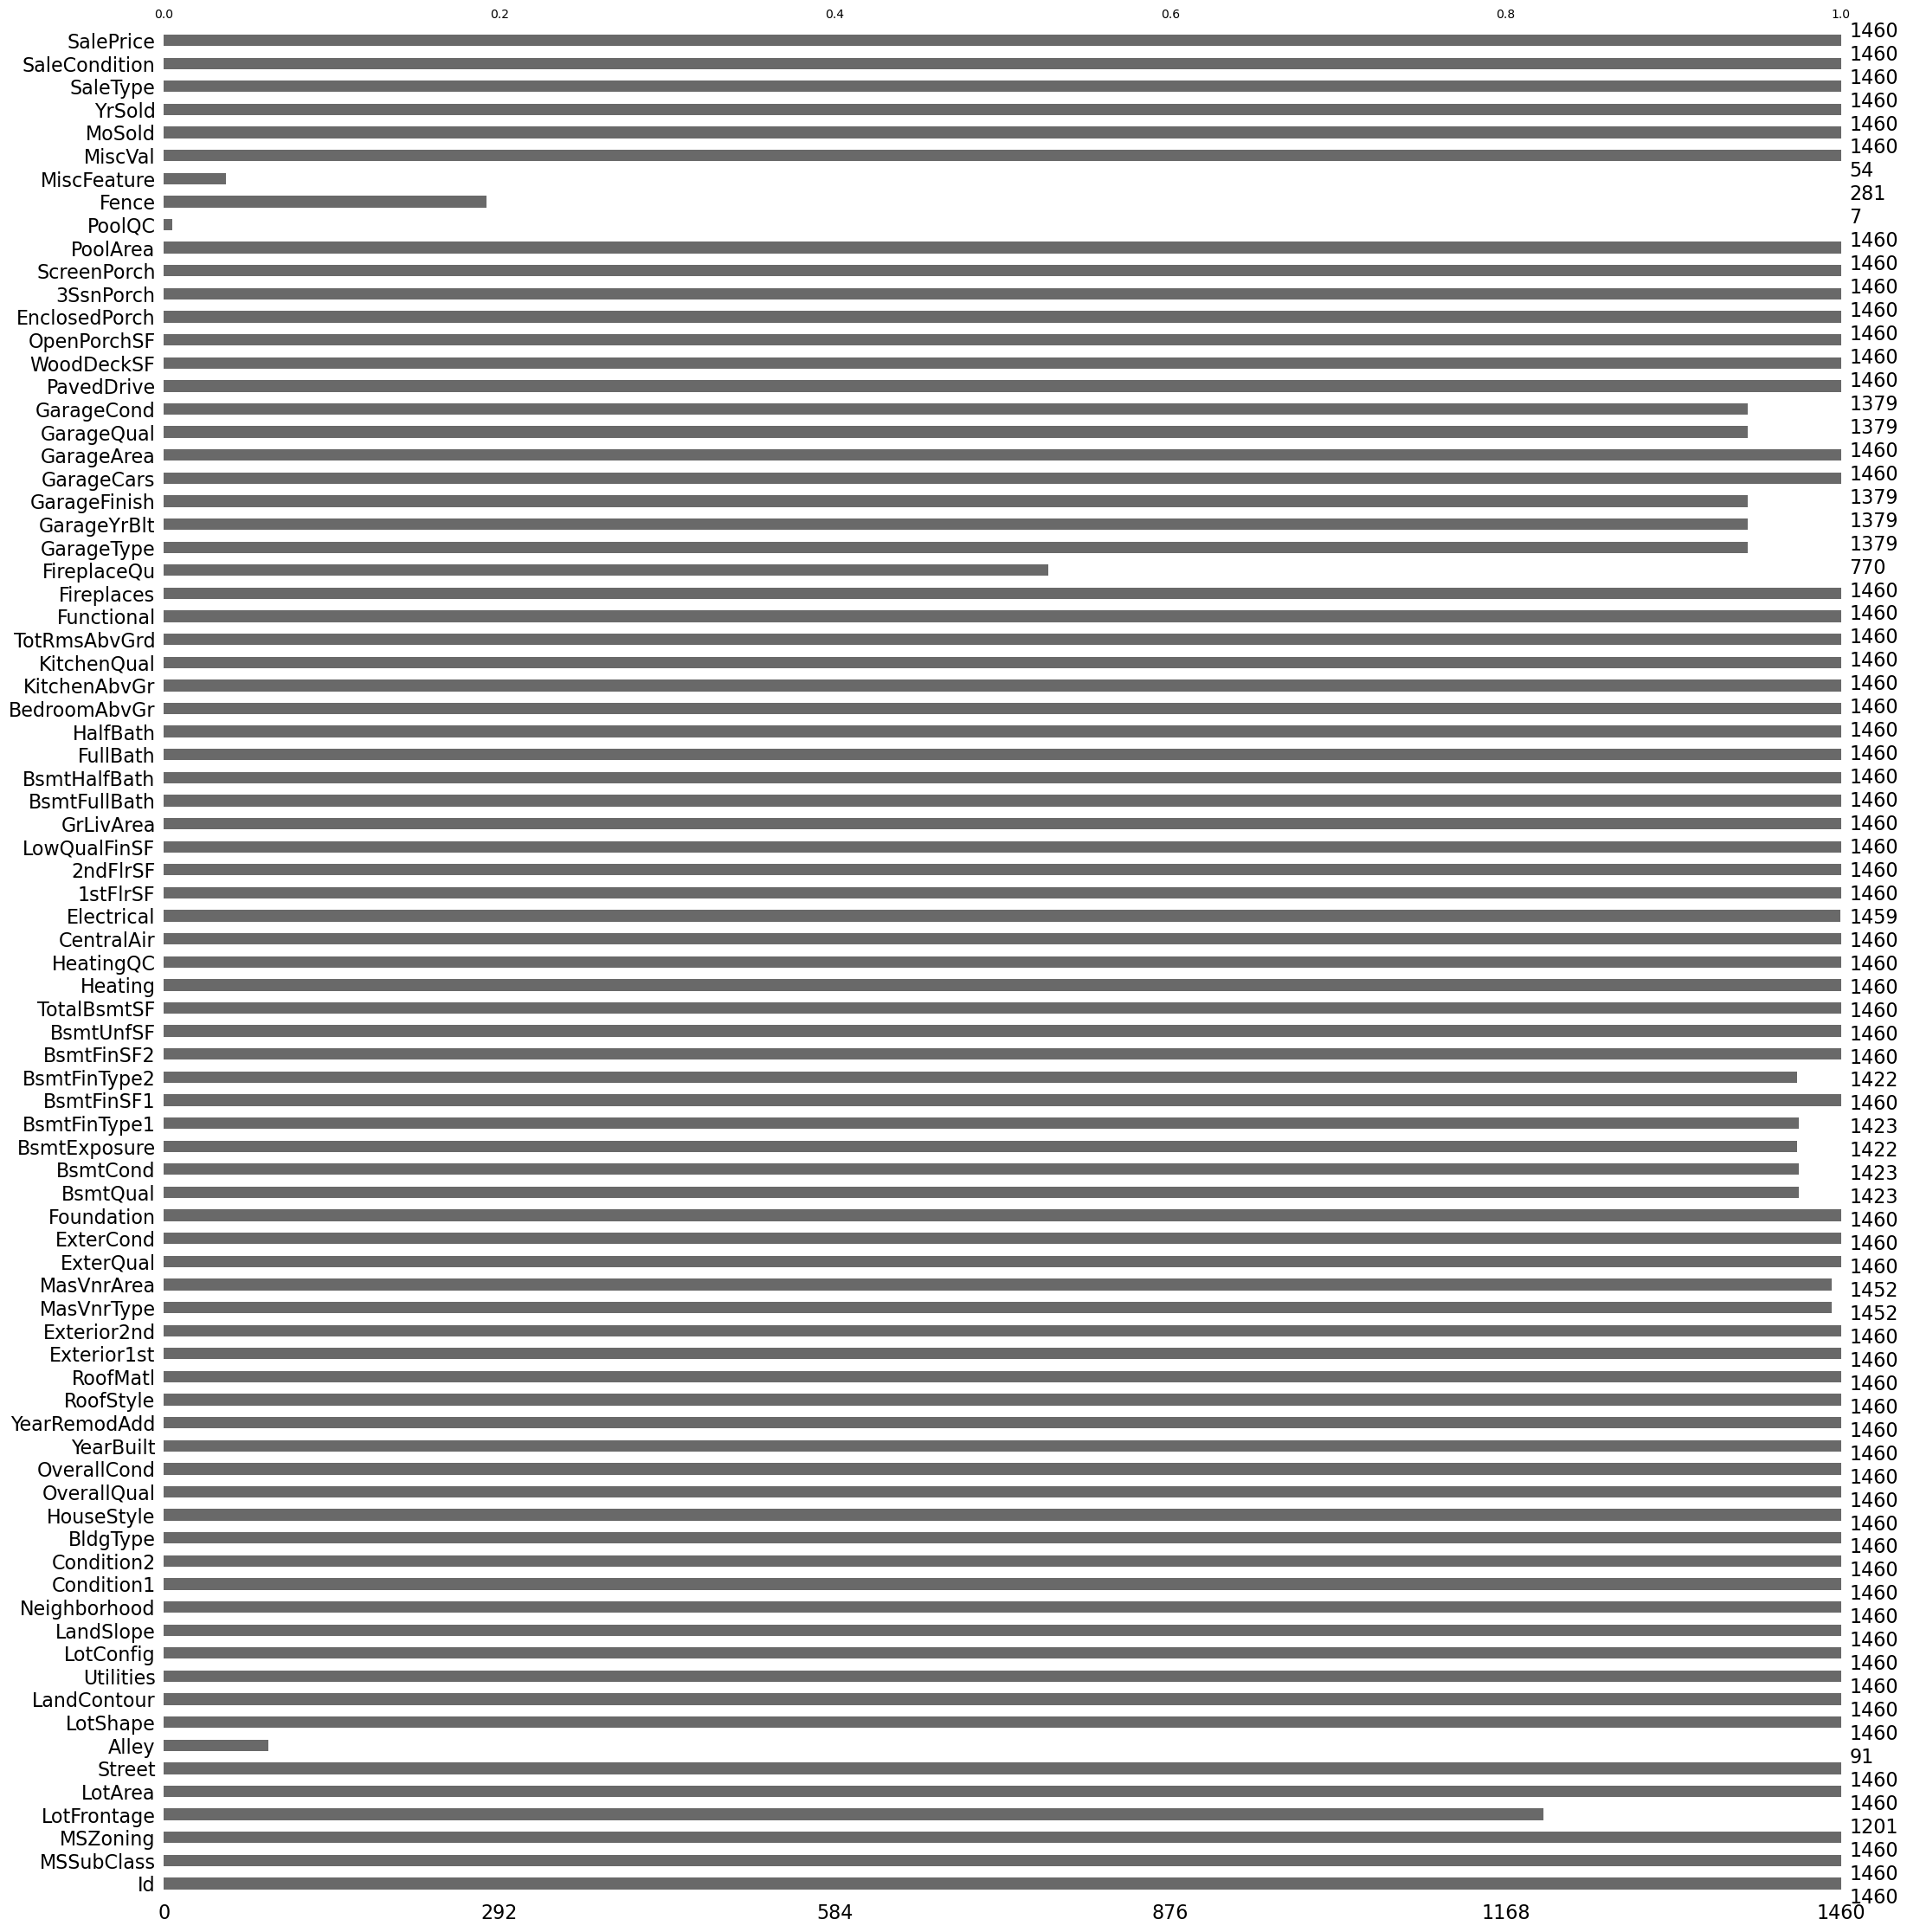

In [11]:
msno.bar(train)

- from data representative we gonna drop from train and test because no value at this columns 

<AxesSubplot:>

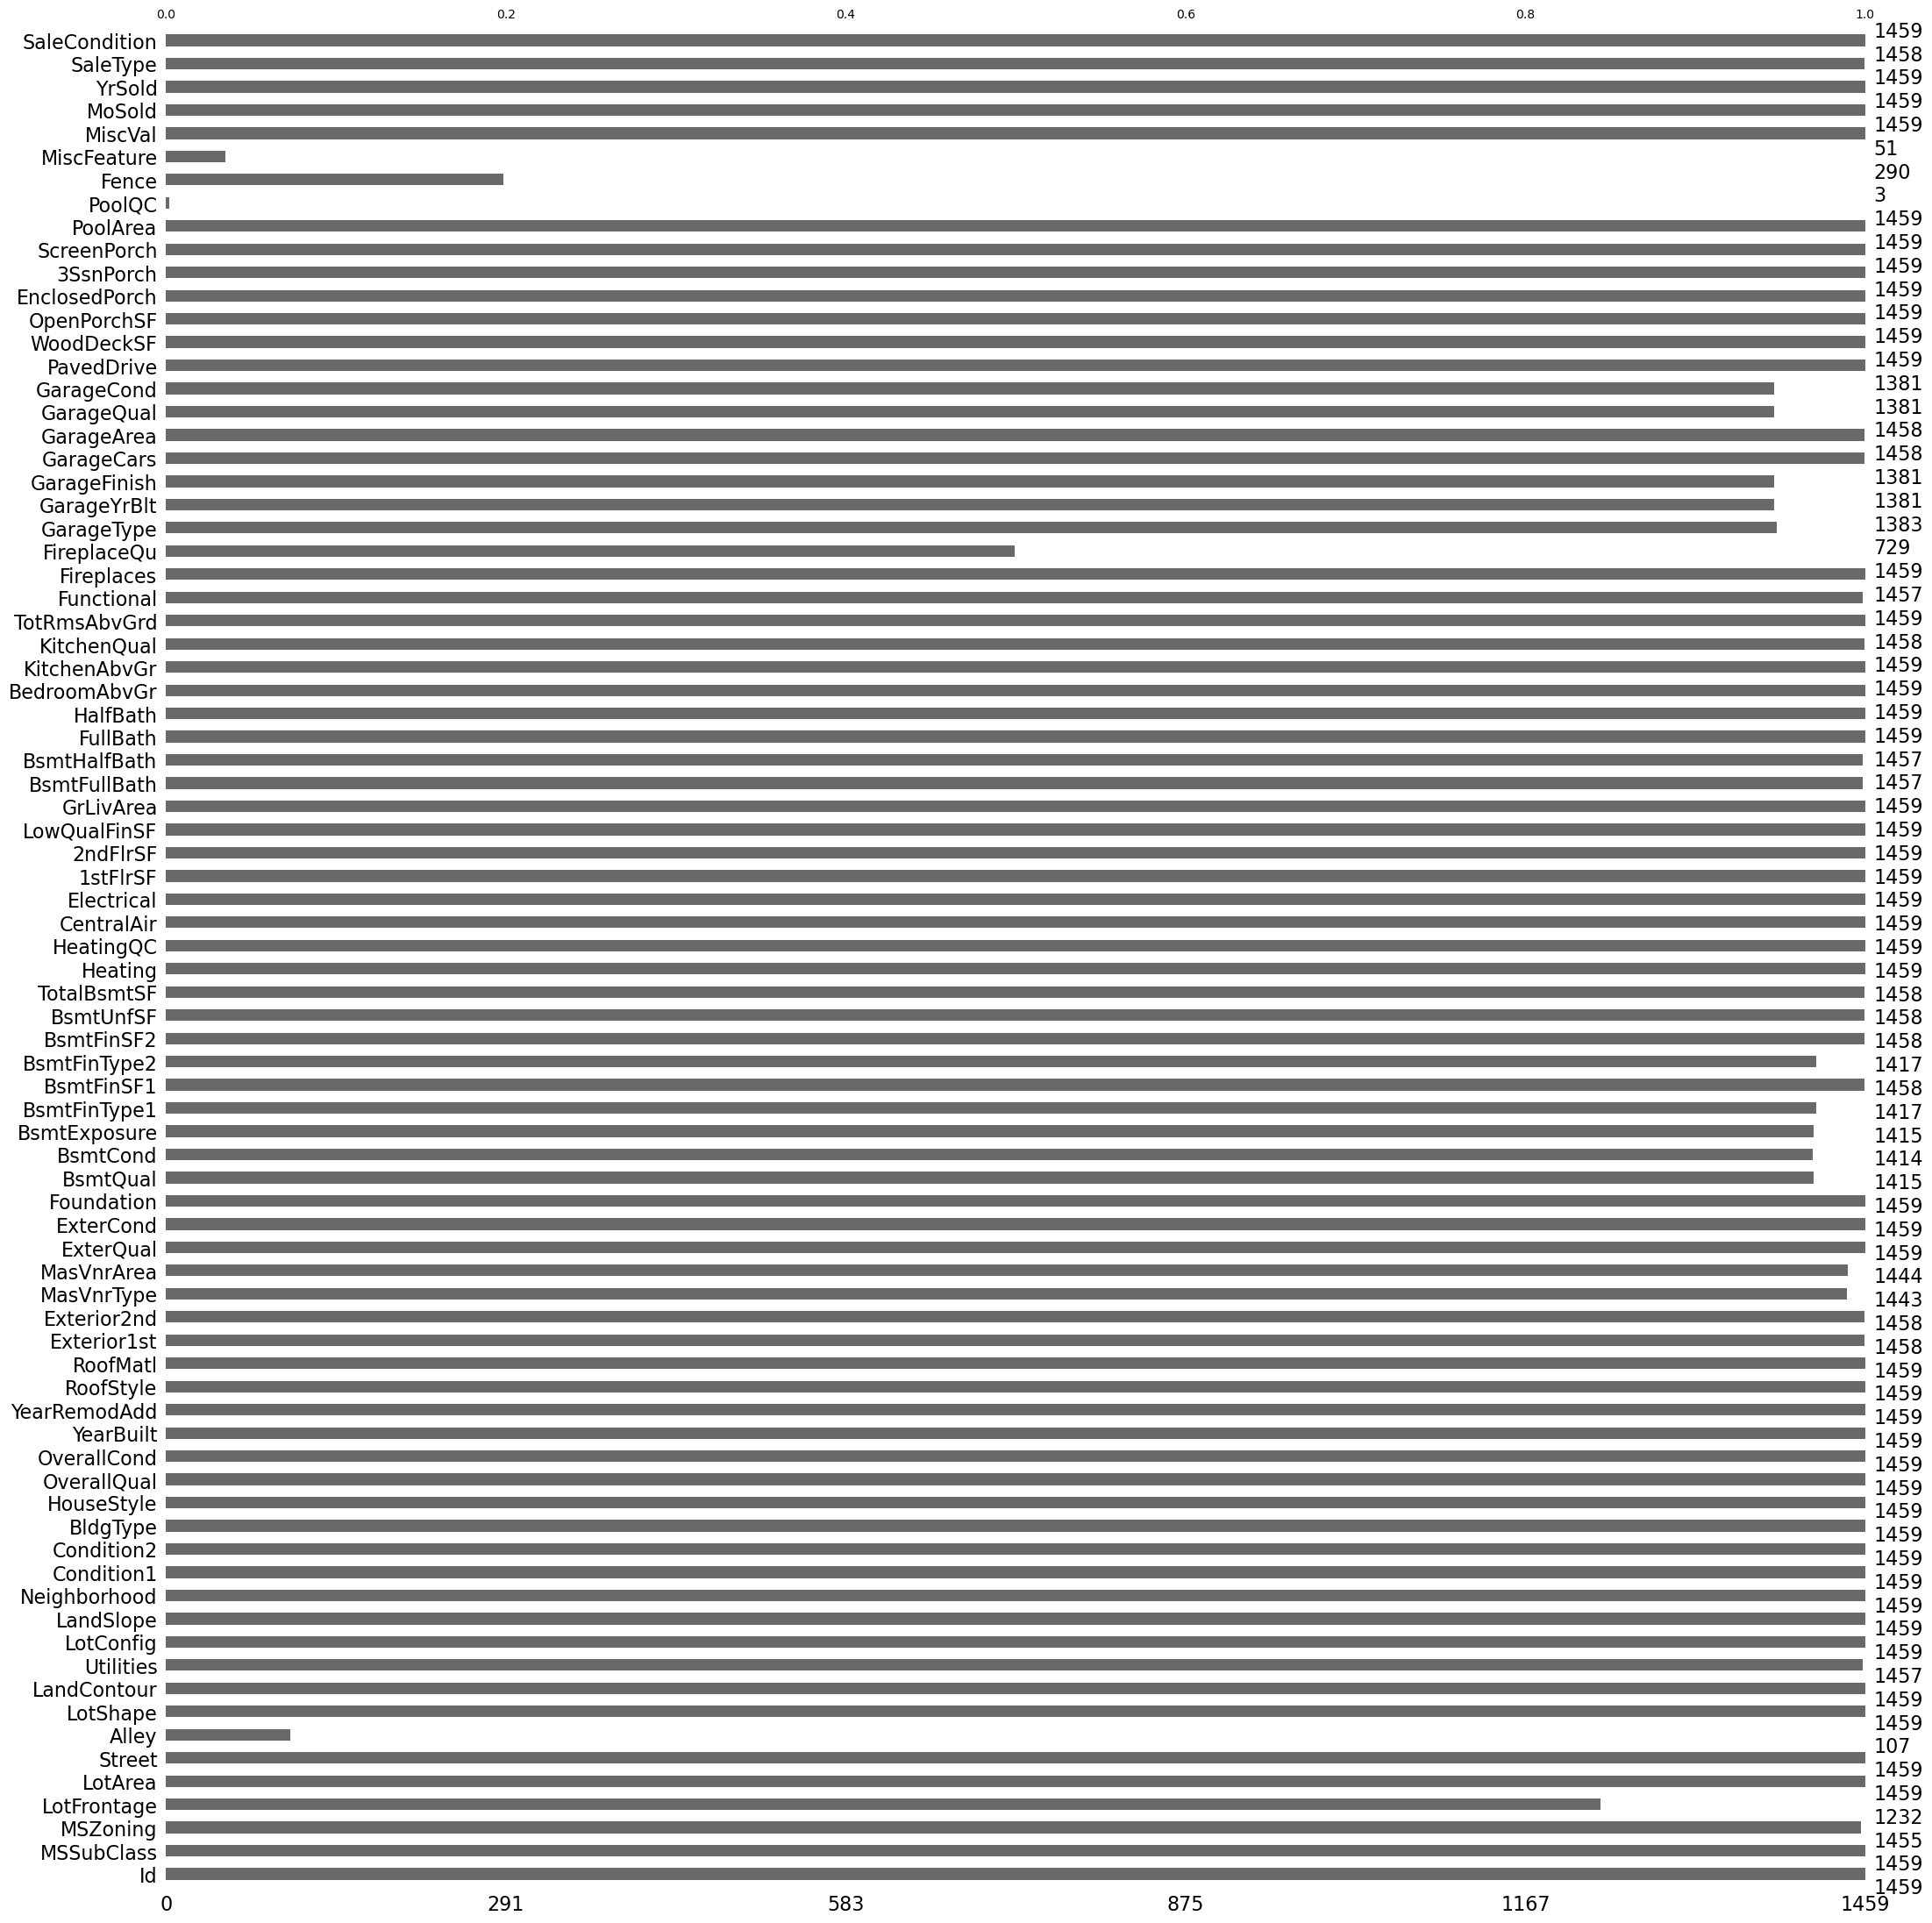

In [12]:
msno.bar(test)

<AxesSubplot:>

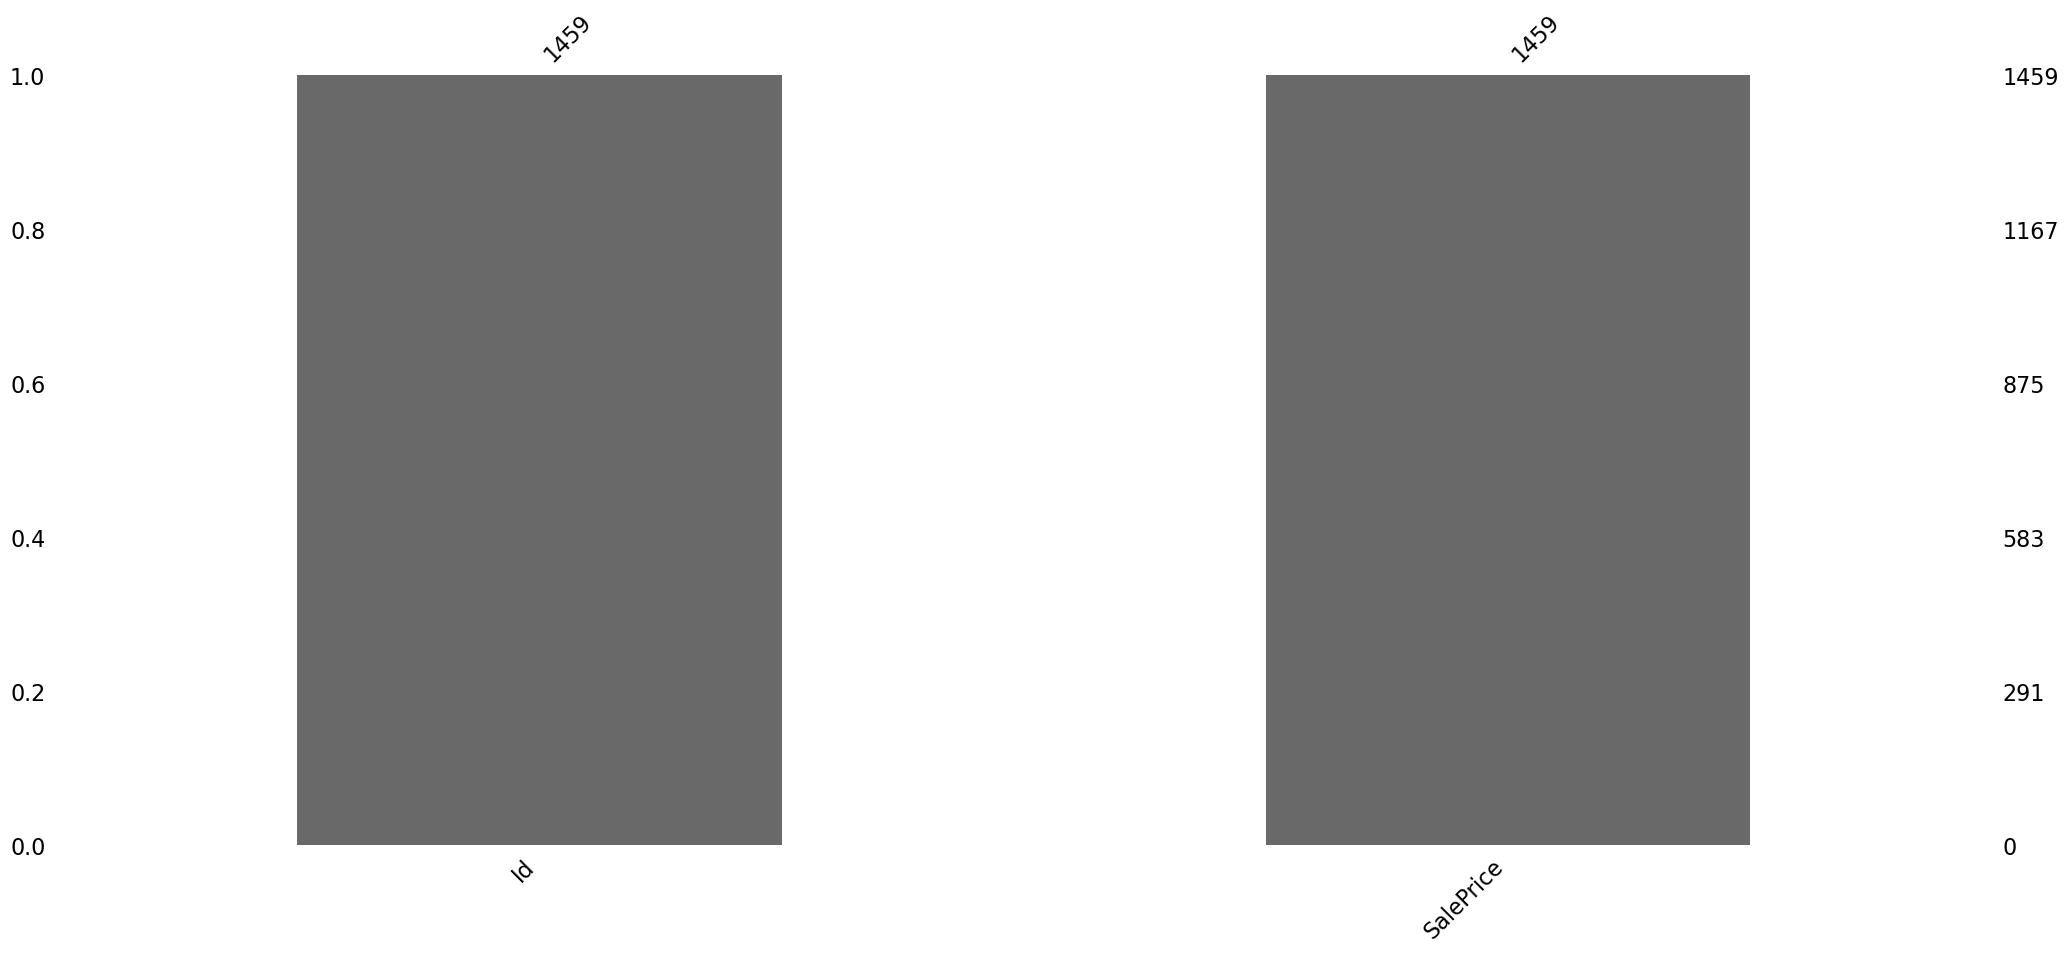

In [13]:
msno.bar(sample_submission)

- the shape from all this data was 1459 

# intrested at columns year and month maybe we can make time series from the data 

- we check year and month columns 

In [14]:
train . columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
train['MoSold'].unique

<bound method Series.unique of 0        2
1        5
2        9
3        2
4       12
        ..
1455     8
1456     2
1457     5
1458     4
1459     6
Name: MoSold, Length: 1460, dtype: int64>

In [16]:
train['YrSold'].unique

<bound method Series.unique of 0       2008
1       2007
2       2008
3       2006
4       2008
        ... 
1455    2007
1456    2010
1457    2010
1458    2010
1459    2008
Name: YrSold, Length: 1460, dtype: int64>

In [17]:
train['YrSold'].describe

<bound method NDFrame.describe of 0       2008
1       2007
2       2008
3       2006
4       2008
        ... 
1455    2007
1456    2010
1457    2010
1458    2010
1459    2008
Name: YrSold, Length: 1460, dtype: int64>

In [18]:
train['SalePrice'].unique

<bound method Series.unique of 0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64>

In [19]:
train['SaleType'].unique

<bound method Series.unique of 0       WD
1       WD
2       WD
3       WD
4       WD
        ..
1455    WD
1456    WD
1457    WD
1458    WD
1459    WD
Name: SaleType, Length: 1460, dtype: object>

In [20]:
train[ 'SaleCondition'].unique

<bound method Series.unique of 0        Normal
1        Normal
2        Normal
3       Abnorml
4        Normal
         ...   
1455     Normal
1456     Normal
1457     Normal
1458     Normal
1459     Normal
Name: SaleCondition, Length: 1460, dtype: object>

In [21]:
train['HouseStyle'].unique

<bound method Series.unique of 0       2Story
1       1Story
2       2Story
3       2Story
4       2Story
         ...  
1455    2Story
1456    1Story
1457    2Story
1458    1Story
1459    1Story
Name: HouseStyle, Length: 1460, dtype: object>

In [22]:
train['LotArea']

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64

In [23]:
train['YearBuilt'].unique

<bound method Series.unique of 0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64>

In [24]:
import matplotlib as plt
import seaborn as sns 

## preprocessing

In [25]:
#data set and array 
import pandas as pd 
import numpy as np 

#test split data 
from sklearn.model_selection import train_test_split

#model 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#check 
from sklearn.metrics import f1_score , recall_score , precision_score , classification_report , confusion_matrix

#diagram for check 
from sklearn.metrics import plot_roc_curve , plot_precision_recall_curve

#visualisasi diagram data 
import seaborn as sns 
import matplotlib.pyplot as plt 

#warning 
import warnings

#model selection 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold

#imputer
from sklearn.impute import SimpleImputer

#metrik
from sklearn.metrics import f1_score




In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
x = train[['YearBuilt' , 'LotArea' , 'HouseStyle','SaleCondition']]
Y = train['SalePrice']

# matric and boosting to model

- can use Advanced regression techniques like random forest and gradient boosting or anything you like to check accuracy use cross vall score because it easy LOL

- x = feature for the data ('YearBuilt' , 'LotArea' , 'HouseStyle','SaleCondition')
- y = target ('SalePrice')

In [28]:
X = train[['YearBuilt' , 'LotArea' , 'HouseStyle','SaleCondition']]
y = train['SalePrice']

In [29]:
X_test = test[['YearBuilt' , 'LotArea' , 'HouseStyle','SaleCondition']]


- model for this data 

In [30]:
logreg = LogisticRegression(solver='liblinear',random_state= 2020)
KNN = KNeighborsClassifier(n_neighbors = 5  )
Tree = DecisionTreeClassifier(criterion='entropy',max_depth =5,random_state=2020)
random = RandomForestRegressor(criterion= "squared_error",n_estimators=  100)

- transofrm categorical array for this case house style

In [31]:
import category_encoders as ce 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [32]:
import category_encoders as ce 

In [33]:
binary = ce.BinaryEncoder()
binary_var = ['SaleCondition','HouseStyle' ]

In [34]:
test['HouseStyle'].unique

<bound method Series.unique of 0       1Story
1       1Story
2       2Story
3       2Story
4       1Story
         ...  
1454    2Story
1455    2Story
1456    1Story
1457    SFoyer
1458    2Story
Name: HouseStyle, Length: 1459, dtype: object>

In [35]:
Transformer = ColumnTransformer([
                                ('binary',binary,binary_var),],remainder='passthrough')

In [36]:
Transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('binary', BinaryEncoder(),
                                 ['SaleCondition', 'HouseStyle'])])

- transofrmer success we can create at our data target and feature so let apply it

In [37]:
X.columns

Index(['YearBuilt', 'LotArea', 'HouseStyle', 'SaleCondition'], dtype='object')

In [38]:
X_test_preprocessing = Transformer.fit_transform(X_test)
X_test_preprocessing=pd.DataFrame(X_test_preprocessing )
X_test_preprocessing.columns = dummy_var = list(Transformer.transformers_[0][1].get_feature_names()) +  ['YearBuilt', 'LotArea']

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:361: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  category=FutureWarning)


In [39]:
X_preprocessing = Transformer.fit_transform(X)
X_preprocessing=pd.DataFrame(X_preprocessing )



In [40]:
dummy_var = list(Transformer.transformers_[0][1].get_feature_names())

In [41]:
X.columns

Index(['YearBuilt', 'LotArea', 'HouseStyle', 'SaleCondition'], dtype='object')

In [42]:
X_preprocessing.columns = dummy_var + ['YearBuilt', 'LotArea']

In [43]:
X_preprocessing

,SaleCondition_0,SaleCondition_1,SaleCondition_2,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,YearBuilt,LotArea
0,0,0,1,0,0,0,1,2003,8450
1,0,0,1,0,0,1,0,1976,9600
2,0,0,1,0,0,0,1,2001,11250
3,0,1,0,0,0,0,1,1915,9550
4,0,0,1,0,0,0,1,2000,14260
...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,0,0,1,1999,7917
1456,0,0,1,0,0,1,0,1978,13175
1457,0,0,1,0,0,0,1,1941,9042
1458,0,0,1,0,0,1,0,1950,9717


In [44]:
def modeling_result(models): 
    models.fit(X_preprocessing,y)
    
    y_pred_tree = models.predict(X_preprocessing)
    print(classification_report(y_pred_tree,y))

    fi=models.feature_importances_
    imp_table = pd.DataFrame({
        'imp':fi
    },index = X_preprocessing.columns )
    
    imp_table.sort_values(by = 'imp').plot(kind='barh', figsize = (12,12))
    

In [45]:
from sklearn.metrics import classification_report

- Tree

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       34900       0.00      0.00      0.00         0
       35311       0.00      0.00      0.00         0
       37900       0.00      0.00      0.00         0
       39300       0.00      0.00      0.00         0
       40000       0.00      0.00      0.00         0
       52000       0.00      0.00      0.00         0
       52500       0.00      0.00      0.00         0
       55000       0.00      0.00      0.00         0
       55993       0.00      0.00      0.00         0
       58500       0.00      0.00      0.00         0
       60000       0.00      0.00      0.00         0
       61000       0.00      0.00      0.00         0
       62383       0.00      0.00      0.00         0
       64500       0.00      0.00      0.00         0
       66500       0.00      0.00      0.00         0
       67000       0.00      0.00      0.00         0
       68400       0.00      0.00      0.00         0
       68500       0.00    

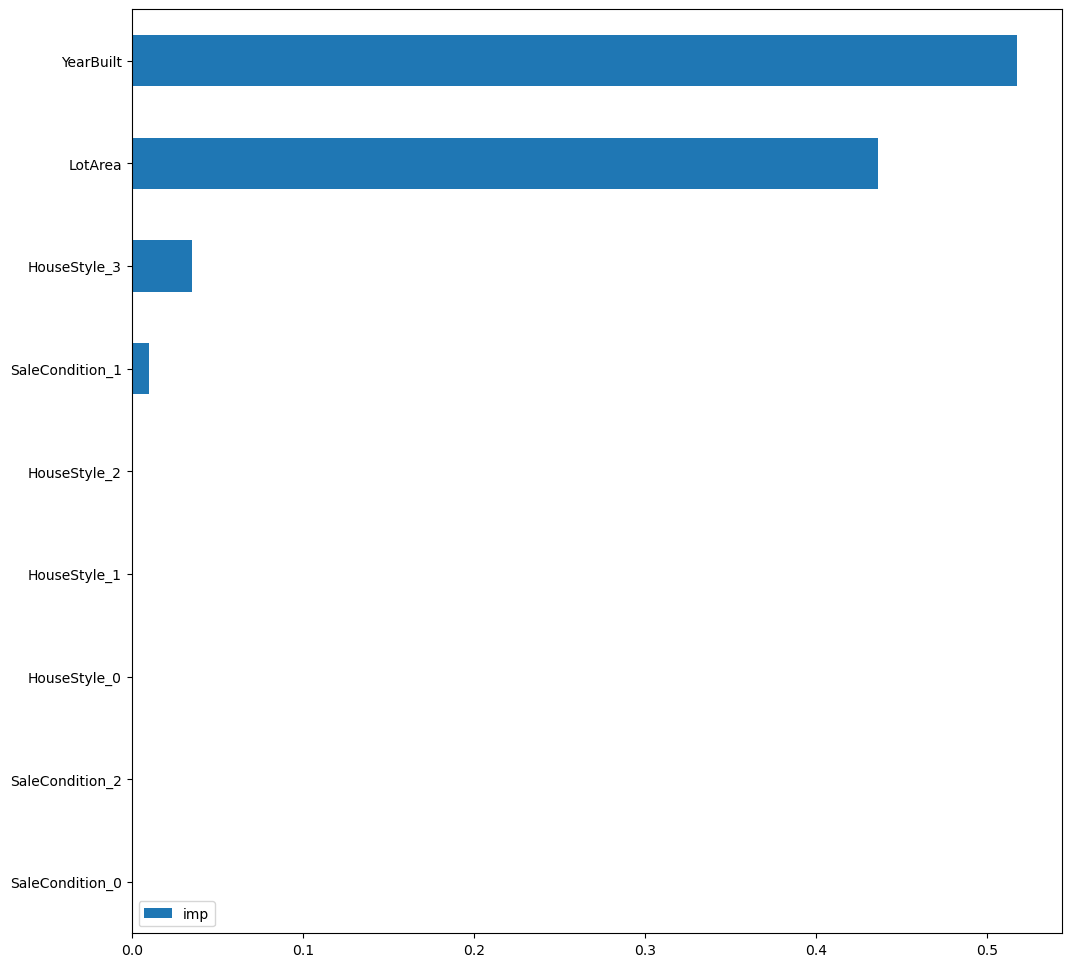

In [46]:
modeling_result(Tree)

- logreg

In [47]:
logreg = logreg.fit(X_preprocessing,y)

In [48]:
y_pred_logreg = logreg.predict(X_preprocessing)
print(classification_report(y_pred_logreg,y))


              precision    recall  f1-score   support

       34900       0.00      0.00      0.00         0
       35311       0.00      0.00      0.00         0
       37900       0.00      0.00      0.00         0
       39300       0.00      0.00      0.00         0
       40000       0.00      0.00      0.00         0
       52000       0.00      0.00      0.00         0
       52500       0.00      0.00      0.00         0
       55000       0.00      0.00      0.00         0
       55993       0.00      0.00      0.00         0
       58500       0.00      0.00      0.00         0
       60000       0.00      0.00      0.00         0
       61000       0.00      0.00      0.00         0
       62383       0.00      0.00      0.00         0
       64500       0.00      0.00      0.00         0
       66500       0.00      0.00      0.00         0
       67000       0.00      0.00      0.00         0
       68400       0.00      0.00      0.00         0
       68500       0.00    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- KNN

In [49]:
KNN = KNN.fit(X_preprocessing,y)

In [50]:
y_pred_KNN = KNN.predict(X_preprocessing)
print(classification_report(y_pred_KNN,y))

    

              precision    recall  f1-score   support

       34900       1.00      0.50      0.67         2
       35311       1.00      0.14      0.25         7
       37900       1.00      0.25      0.40         4
       39300       1.00      0.20      0.33         5
       40000       1.00      0.20      0.33         5
       52000       1.00      0.33      0.50         3
       52500       0.00      0.00      0.00         0
       55000       1.00      0.25      0.40         8
       55993       1.00      0.20      0.33         5
       58500       1.00      0.33      0.50         3
       60000       1.00      0.25      0.40        12
       61000       1.00      1.00      1.00         1
       62383       1.00      0.17      0.29         6
       64500       1.00      0.33      0.50         3
       66500       1.00      0.20      0.33         5
       67000       0.50      0.25      0.33         4
       68400       1.00      0.50      0.67         2
       68500       1.00    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- random forrest

In [51]:
X_preprocessing.shape

(1460, 9)

In [52]:
y.shape

(1460,)

In [53]:
random = random.fit(X_preprocessing,y)


In [54]:
y_pred_random = random.predict(X_preprocessing)
print (y_pred_random)

[202292.         181627.         232959.         ... 216690.
 138531.08333333 144133.        ]


In [55]:
skfold = StratifiedKFold(n_splits=5)
random_cv = cross_val_score(random,X_preprocessing , y,cv=skfold)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


In [56]:
print('hasil cros validasi ', random_cv)
print('rata- rata hasil cross validasi ',random_cv.mean())
print('standar deviasi cross validasi ',random_cv.std())

hasil cros validasi  [0.47144503 0.46517379 0.49536622 0.56626501 0.38011811]
rata- rata hasil cross validasi  0.47567363188430856
standar deviasi cross validasi  0.05975546977741014


<AxesSubplot:>

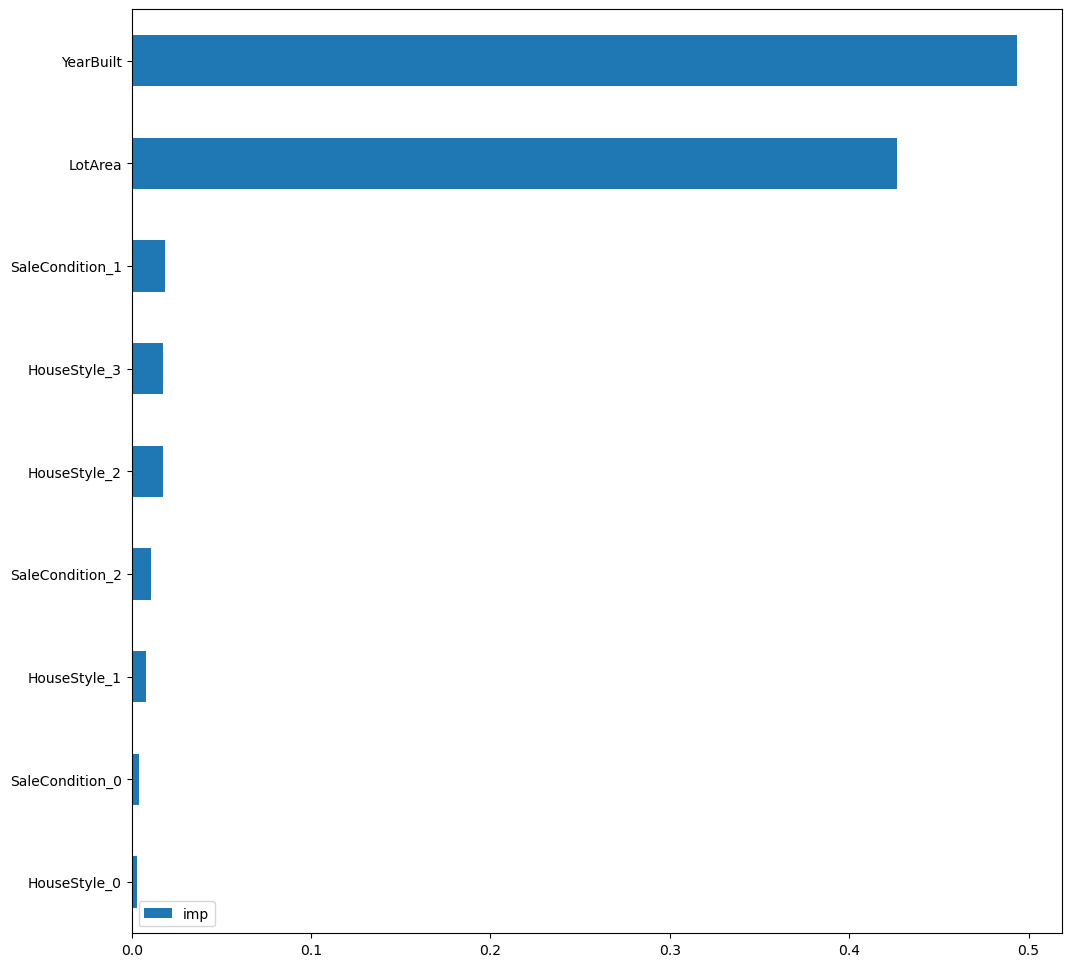

In [57]:
fi=random.feature_importances_
imp_table = pd.DataFrame({'imp':fi},index = X_preprocessing.columns )
    
imp_table.sort_values(by = 'imp').plot(kind='barh', figsize = (12,12))

the best prediction model was from random forrest so we try to improve prediction with hyper param 

In [58]:
from sklearn.model_selection import RandomizedSearchCV

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [61]:
random = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = random, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_preprocessing,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   3.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   3.3s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   8.7s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   2.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   3.1s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimator

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [62]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

# we got the best estimator for the random forrest model at this data
 - 'n_estimators': 600,
 - 'min_samples_split': 10,
 - 'min_samples_leaf': 2,
 - 'max_features': 'sqrt',
 - 'max_depth': 60,
 - 'bootstrap': True

In [63]:
random = RandomForestRegressor(n_estimators= 600,
 min_samples_split= 10,
 min_samples_leaf= 2,
 max_features= 'sqrt',
 max_depth= 60,
 bootstrap= True)

In [64]:
random = random.fit(X_preprocessing,y)
y_pred_random = random.predict(X_preprocessing)

In [65]:
print(y_pred_random)

[202673.96023848 167866.40520725 236111.50662139 ... 178600.37933672
 128208.69608501 141148.86082953]


In [66]:
random_cv = cross_val_score(random,X_preprocessing , y,cv=skfold)
print('hasil cros validasi ', random_cv)
print('rata- rata hasil cross validasi ',random_cv.mean())
print('standar deviasi cross validasi ',random_cv.std())

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


hasil cros validasi  [0.60176748 0.51577849 0.57823877 0.61084874 0.45932865]
rata- rata hasil cross validasi  0.553192424330895
standar deviasi cross validasi  0.05748272308455728


improve score to 0.10 that was amazing just for hyperparam 

## to be continue